In [1]:
#membaca dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')
df.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [2]:
#menghitung jumlah klasifikasi label
df['label'].value_counts()

fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

In [3]:
#melakukan one hot encoding
category = pd.get_dummies(df.label)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru

,text,anger,fear,joy,sadness
0,You must be knowing #blithe means (adj.) Happ...,0,0,1,0
1,Old saying 'A #smile shared is one gained for ...,0,0,1,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,0,0,1,0
3,@Elaminova sparkling water makes your life spa...,0,0,1,0
4,I'm tired of everybody telling me to chill out...,0,0,1,0
...,...,...,...,...,...
3137,Why does Candice constantly pout #GBBO 💄😒,0,0,0,1
3138,"@redBus_in #unhappy with #redbus CC, when I ta...",0,0,0,1
3139,"@AceOperative789 no pull him afew weeks ago, s...",0,0,0,1
3140,I'm buying art supplies and I'm debating how s...,0,0,0,1


In [4]:
#mengubah nilai-nilai dari df ke dalam tipe data numpy array menggunakan atribut values
text = df_baru['text'].values
label = df_baru[['anger', 'fear', 'joy', 'sadness']].values

In [5]:
#membagi data training dan testing
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [6]:
#melakukan tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [7]:
#membuat model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
#melatih model
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
79/79 - 5s - loss: 1.3741 - accuracy: 0.3191 - val_loss: 1.3660 - val_accuracy: 0.2941
Epoch 2/30
79/79 - 2s - loss: 1.0119 - accuracy: 0.5690 - val_loss: 0.8657 - val_accuracy: 0.6598
Epoch 3/30
79/79 - 2s - loss: 0.3535 - accuracy: 0.8858 - val_loss: 0.6484 - val_accuracy: 0.7615
Epoch 4/30
79/79 - 2s - loss: 0.1648 - accuracy: 0.9530 - val_loss: 0.6167 - val_accuracy: 0.7997
Epoch 5/30
79/79 - 2s - loss: 0.1024 - accuracy: 0.9737 - val_loss: 0.6870 - val_accuracy: 0.7854
Epoch 6/30
79/79 - 2s - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.6924 - val_accuracy: 0.7774
Epoch 7/30
79/79 - 2s - loss: 0.0690 - accuracy: 0.9809 - val_loss: 0.7381 - val_accuracy: 0.7774
Epoch 8/30
79/79 - 2s - loss: 0.0625 - accuracy: 0.9825 - val_loss: 0.7207 - val_accuracy: 0.7838
Epoch 9/30
79/79 - 2s - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.8539 - val_accuracy: 0.7901
Epoch 10/30
79/79 - 2s - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.8710 - val_accuracy: 0.7631
Epoch 11/30
79/79 -

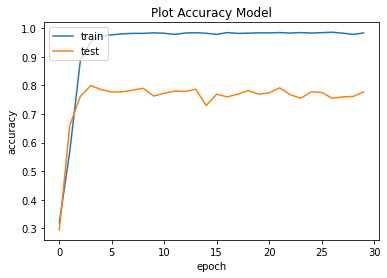

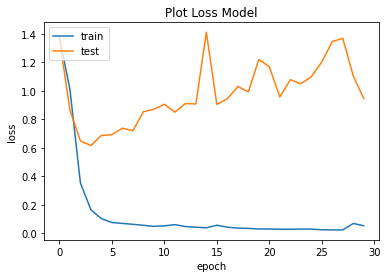

In [9]:
#membuat plot akurasi dan plot loss

# Plot Akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()